In [1]:
import pandas as pd 
import os
def get_data(filename):
    """
    This is function is to read csv files 
    and transfer into dataframe

    Parameters
    ----------
    filename : string
        the full name of that filename (path) 

    Returns
    -------
    None.

    """
    # df = pd.read_csv(f"{path}{filename}")
    df = pd.read_csv(filename)
    return df

In [19]:
df_data = get_data('diamonds.csv')

## Get familiar with the data

In [20]:
df_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


In [21]:
# print the sets 
cut_set = set(df_data['cut'])
color_set = set(df_data['color'])
color_sorted_set = sorted(color_set)
clarity_set = set(df_data['clarity'])
print('cut sets: ',cut_set)
print('color sets: ',color_sorted_set)
print('clarity sets: ',clarity_set)
# Cut: Fair, Good, Very Good, Premium, Ideal
# Color: J < I < H < G < F < E < D 
# Clarity: I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

cut sets:  {'Ideal', 'Premium', 'Good', 'Very Good', 'Fair'}
color sets:  ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity sets:  {'I1', 'VS1', 'SI1', 'VVS1', 'IF', 'VVS2', 'SI2', 'VS2'}


## 3.1.1 Handling Categorical Features

In [22]:
def cut_to_categ(df_data):
    for i in range(len(df_data['cut'])):
        if df_data['cut'][i] == 'Fair':
            df_data['cut'][i] = 1
        elif df_data['cut'][i] == 'Good':
            df_data['cut'][i] = 2
        elif df_data['cut'][i] == 'Very Good':
            df_data['cut'][i] = 3
        elif df_data['cut'][i] == 'Premium':
            df_data['cut'][i] = 4
        else:
            df_data['cut'][i] = 5     
    return df_data

def color_to_categ(df_data):
    data = df_data['color']
    for i in range(len(data)):
        if data[i] == 'J':
            data[i] = 1
        elif data[i] == 'I':
            data[i] = 2
        elif data[i] == 'H':
            data[i] = 3
        elif data[i] == 'G':
            data[i] = 4
        elif data[i] == 'F':
            data[i] = 5   
        elif data[i] == 'E':
            data[i] = 6                
        else: #D 
            data[i] = 7     
    df_data['color'] = data
    return df_data  

def clarity_to_categ(df_data):
    data = df_data['clarity']
    for i in range(len(data)):
        if data[i] == 'I1':
            data[i] = 1
        elif data[i] == 'SI2':
            data[i] = 2
        elif data[i] == 'SI1':
            data[i] = 3
        elif data[i] == 'VS2':
            data[i] = 4
        elif data[i] == 'VS1':
            data[i] = 5   
        elif data[i] == 'VVS2':
            data[i] = 6       
        elif data[i] == 'VVS1':
            data[i] = 7
        else: # IF 
            data[i] = 8     
    df_data['clarity'] = data
    return df_data

In [23]:
df_data_1 = cut_to_categ(df_data)

/var/folders/g2/25bsk6jn695bt7xl4cfbjw5h0000gq/T/ipykernel_70336/649154061.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['cut'][i] = 5
/var/folders/g2/25bsk6jn695bt7xl4cfbjw5h0000gq/T/ipykernel_70336/649154061.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['cut'][i] = 4
/var/folders/g2/25bsk6jn695bt7xl4cfbjw5h0000gq/T/ipykernel_70336/649154061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['cut

In [24]:
df_data_1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,2,0.21,4,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,3,0.23,2,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,4,0.29,4,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,5,0.31,2,J,SI2,63.3,58.0,338,4.34,4.35,2.75


In [25]:
df_data_2 = color_to_categ(df_data_1)

/var/folders/g2/25bsk6jn695bt7xl4cfbjw5h0000gq/T/ipykernel_70336/649154061.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = 6
/var/folders/g2/25bsk6jn695bt7xl4cfbjw5h0000gq/T/ipykernel_70336/649154061.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = 2
/var/folders/g2/25bsk6jn695bt7xl4cfbjw5h0000gq/T/ipykernel_70336/649154061.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = 1
/var/folders/g2/25b

In [26]:
df_data_2.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,6,SI2,61.5,55.0,330,3.95,3.98,2.43
1,2,0.21,4,6,SI1,59.8,61.0,327,3.89,3.84,2.31
2,3,0.23,2,6,VS1,56.9,65.0,328,4.05,4.07,2.31
3,4,0.29,4,2,VS2,62.4,58.0,337,4.20,4.23,2.63
4,5,0.31,2,1,SI2,63.3,58.0,338,4.34,4.35,2.75


In [27]:
df_data_3 = clarity_to_categ(df_data_2)

/var/folders/g2/25bsk6jn695bt7xl4cfbjw5h0000gq/T/ipykernel_70336/649154061.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = 2
/var/folders/g2/25bsk6jn695bt7xl4cfbjw5h0000gq/T/ipykernel_70336/649154061.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = 3
/var/folders/g2/25bsk6jn695bt7xl4cfbjw5h0000gq/T/ipykernel_70336/649154061.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = 5
/var/folders/g2/25b

In [28]:
df_data_3.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,6,2,61.5,55.0,330,3.95,3.98,2.43
1,2,0.21,4,6,3,59.8,61.0,327,3.89,3.84,2.31
2,3,0.23,2,6,5,56.9,65.0,328,4.05,4.07,2.31
3,4,0.29,4,2,4,62.4,58.0,337,4.20,4.23,2.63
4,5,0.31,2,1,2,63.3,58.0,338,4.34,4.35,2.75


In [29]:
df_data_3.to_csv('preprocess_diamonds.csv')

## 3.1.2 Standardization (Questions 1)

## Question 2

In [53]:
df_data_3['cut'] = pd.to_numeric(df_data_3['cut'])
df_data_3['color'] = pd.to_numeric(df_data_3['color'])
df_data_3['clarity'] = pd.to_numeric(df_data_3['clarity'])

In [54]:
feature_columns = list(df_data_3.columns)
feature_columns = list(set(feature_columns) - set(['Unnamed: 0','x','y','z']))
print(feature_columns)

['clarity', 'carat', 'cut', 'depth', 'color', 'price', 'table']


Correlation Matrix Heatmap:


<AxesSubplot:>

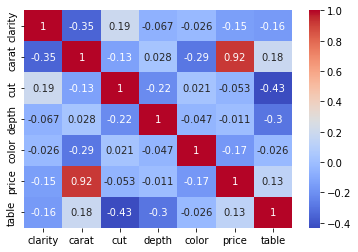

In [57]:
import seaborn as sns
print('Correlation Matrix Heatmap:')
sns.heatmap(df_data_3[feature_columns].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [65]:
CM = df_data_3[feature_columns].corr()
print(CM['price'])
print('The high correlation is: Carat', CM['price']['carat'])

clarity   -0.146802
carat      0.921591
cut       -0.053493
depth     -0.010648
color     -0.172509
price      1.000000
table      0.127134
Name: price, dtype: float64
The high correlation is: Carat 0.9215914337868304


## Question 3

In [70]:
import matplotlib.pyplot as plt
import numpy as np

In [158]:
def plot_hist(title_name,data,bin_num):
    n, bins, patches = plt.hist(data, density=False, bins=bin_num)  # density=False would make counts
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(title_name)
    plt.grid(axis='y', alpha=0.75)
    plt.grid(axis='x', alpha=0.75,linestyle='-.')
    plt.xlabel('Data')
    maxfreq = n.max()
    print('max value:',maxfreq)
    # print(bins.mean())

In [198]:
def sns_hist(title_name,data,bin_num):
    ax = sns.distplot(data,kde = False,bins=bin_num)
    ax.set_title(title_name)
    ax.set_xlabel('Data')
    ax.set_ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75,linestyle='-.')

### Cut histogram

max value: 13065.0


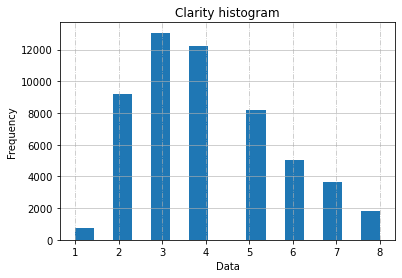

In [188]:
title_name = 'Clarity histogram'
data = df_data_3['clarity']
bin_num = len(list(set(data))) * 2
plot_hist(title_name,data,bin_num)

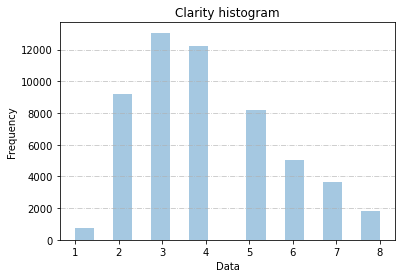

In [199]:
sns_hist(title_name,data,bin_num)

In [137]:
from collections import Counter
count=Counter(data)
print(count)

Counter({3: 13065, 4: 12258, 2: 9194, 5: 8171, 6: 5066, 7: 3655, 8: 1790, 1: 741})


### Cut histogram

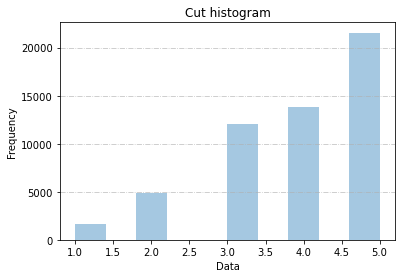

In [218]:
title_name = 'Cut histogram'
data = df_data_3['cut']
bin_num = len(list(set(data))) * 2
sns_hist(title_name,data,bin_num)

### Color histogram

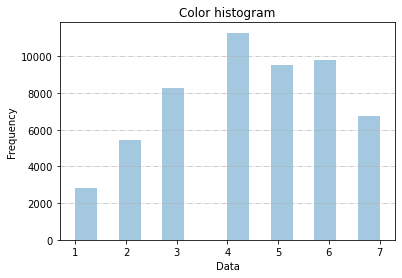

In [217]:
title_name = 'Color histogram'
data = df_data_3['color']
bin_num = len(list(set(data))) * 2
sns_hist(title_name,data,bin_num)

### Carat histogram

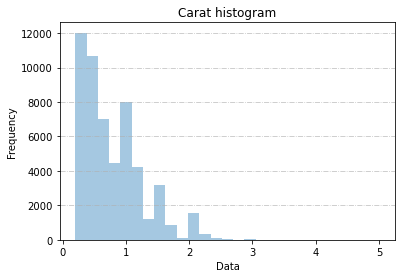

In [216]:
title_name = 'Carat histogram'
data = df_data_3['carat']
bin_num = int(len(list(set(data))) / 10)
sns_hist(title_name,data,bin_num)

### Depth histogram

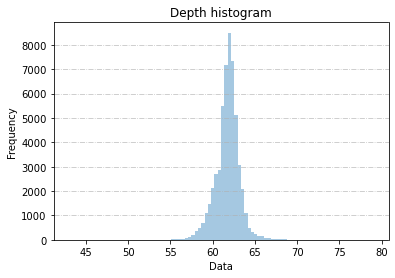

In [203]:
title_name = 'Depth histogram'
data = df_data_3['depth']
bin_num = int(len(list(set(data))) /2)
sns_hist(title_name,data,bin_num)

### Table histogram

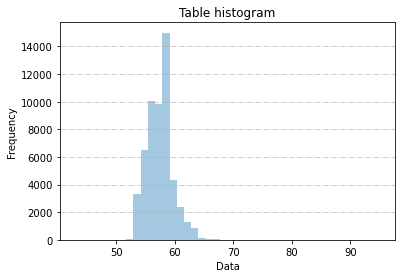

In [208]:
title_name = 'Table histogram'
data = df_data_3['table']
bin_num = int(len(list(set(data)))/3)
sns_hist(title_name,data,bin_num)

### Price histogram

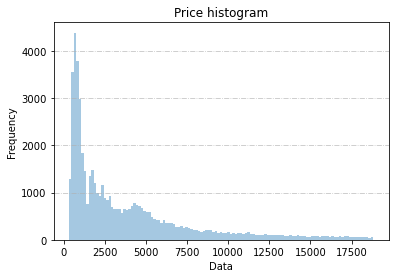

In [221]:
title_name = 'Price histogram'
data = df_data_3['price']
bin_num = int(len(list(set(data)))/100)
sns_hist(title_name,data,bin_num)

## Question 4

Text(0.5, 1.0, 'carat vs price')

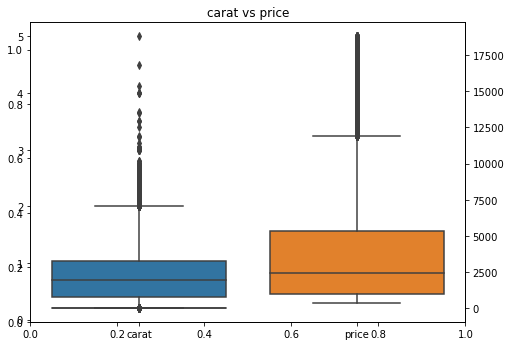

In [268]:
# this code is a little bit problematic 
feature = 'carat'
target = 'price'
title_name = feature + ' vs ' + target
fig, ax1  = plt.subplots(figsize=(7.8, 5.51))

fig.set_size_inches(7.8, 5.51)

plt.ylim(0.0, 1.1)

ax1 = fig.add_subplot(111)

ax1 = sns.boxplot(ax=ax1, data=df_data_3[feature])

ax2 = ax1.twinx()

boxplot = sns.boxplot(ax=ax2, data=df_data_3[[feature,target]])

plt.title(title_name)

In [275]:
def box_plot(feature,target,df_data):
    fig, ax1  = plt.subplots(figsize=(7, 5))

    #feature = 'carat'
    #target = 'price'
    title_name = feature + ' vs ' + target

    props = dict(widths=0.8,patch_artist=True, medianprops=dict(color="gold"))
    box1=ax1.boxplot(df_data[feature], positions=[0], **props)

    ax2 = ax1.twinx()
    box2=ax2.boxplot(df_data[target],positions=[1], **props)

    # ax1.set_xticks(range(len(df.columns)))
    # ax1.set_xticklabels(df.columns)

    for b in box1["boxes"]+box2["boxes"]:
        b.set_facecolor(next(ax1._get_lines.prop_cycler)["color"])
    plt.title(title_name)
    plt.show()

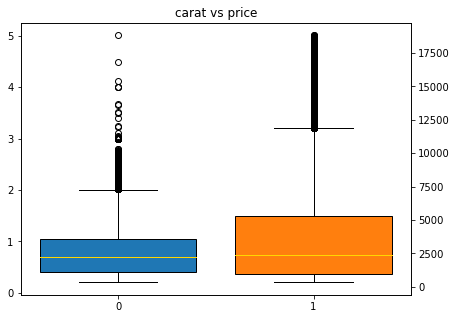

In [276]:
box_plot('carat','price',df_data_3)

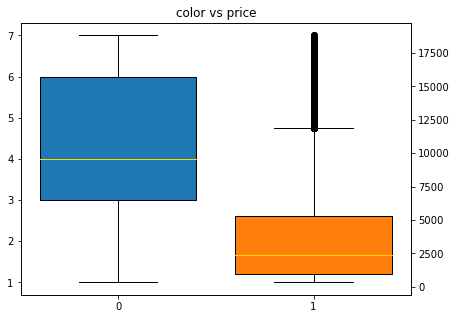

In [277]:
box_plot('color','price',df_data_3)

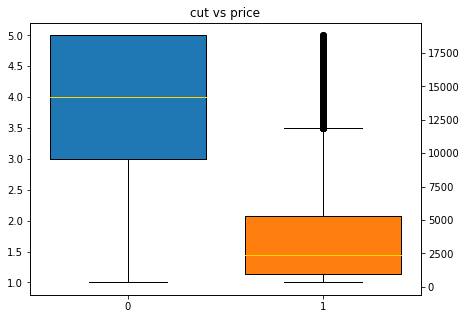

In [278]:
box_plot('cut','price',df_data_3)

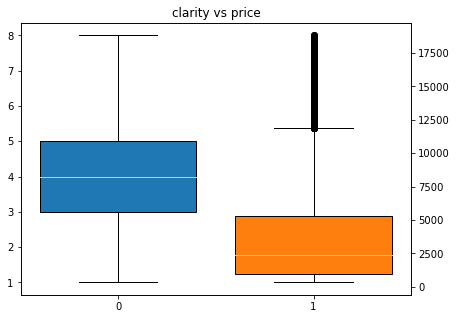

In [279]:
box_plot('clarity','price',df_data_3)

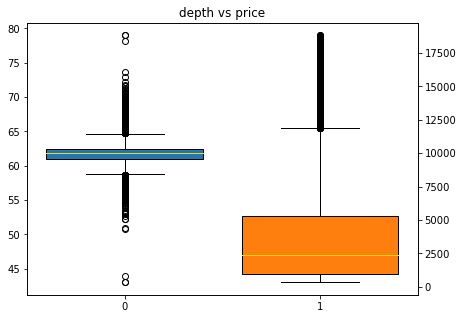

In [280]:
box_plot('depth','price',df_data_3)

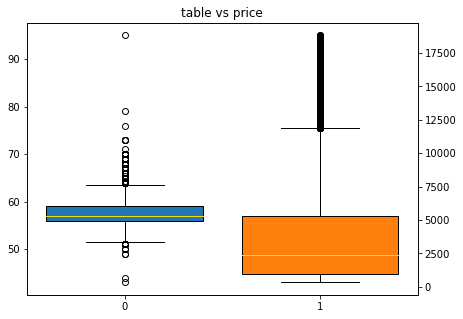

In [281]:
box_plot('table','price',df_data_3)

## Question 5: plot the counts by color, cut and clarity

In [297]:
def cout_plot(title_name,data_name,df_data):
    data = df_data[data_name]
    count = Counter(data)
    
    plt.bar(count.keys(),count.values())
    plt.title(title_name)
    plt.xlabel(data_name)
    plt.ylabel('Conut numbers')
    plt.grid(axis='y', alpha=0.75,linestyle='-.')

### cut count plot

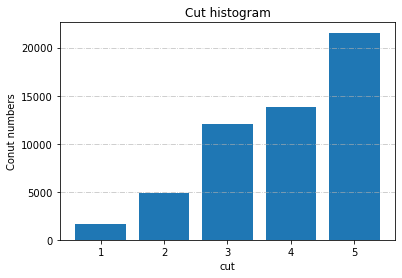

In [300]:
title_name = 'Cut histogram'
data_name = 'cut'
cout_plot(title_name,data_name,df_data_3)

### Color count plot

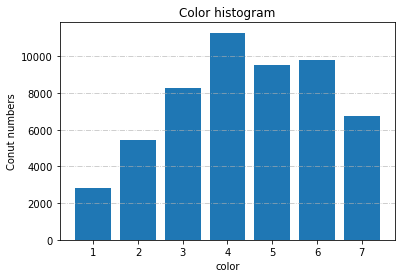

In [301]:
title_name = 'Color histogram'
data_name = 'color'
cout_plot(title_name,data_name,df_data_3)

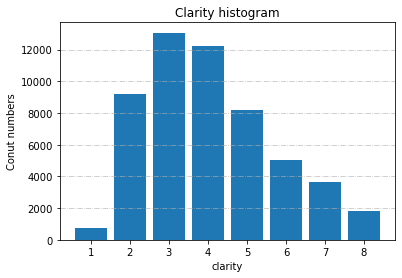

In [302]:
title_name = 'Clarity histogram'
data_name = 'clarity'
cout_plot(title_name,data_name,df_data_3)

## Question 7

In [304]:
!pip install scikit-learn

In [305]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

In [309]:
feature_columns = list(df_data_3.columns)
feature_columns = list(set(feature_columns) - set(['Unnamed: 0','x','y','z','price']))
print(feature_columns)

['clarity', 'carat', 'cut', 'depth', 'color', 'table']


In [ ]:
np.set_printoptions(suppress=True)

In [348]:
def sort_score(reg_score):
    reg_dict = {}
    for i in range(len(reg_score)):
        reg_dict[feature_columns[i]] = reg_score[i]  
    sorted_reg = dict(sorted(reg_dict.items(), key=lambda item: item[1]))    
    return sorted_reg

def feature_selection(feature_columns,df_data,target):
    mu_reg_score = mutual_info_regression(df_data_3[feature_columns],df_data_3[target])
    f_reg_score = f_regression(df_data_3[feature_columns],df_data_3[target])
    
    sorted_mu_reg = sort_score(mu_reg_score)
    sorted_f_reg_1 = sort_score(f_reg_score[0]) # f-statistic for each feature
    sorted_f_reg_2 = sort_score(f_reg_score[1]) # P - values
    return sorted_mu_reg,sorted_f_reg_1,sorted_f_reg_2
    

In [349]:
sorted_mu_reg,sorted_f_reg_f, sorted_f_reg_p= feature_selection(feature_columns,df_data_3,'price')

In [351]:
print('mutual_regression scorted scores:')
print(sorted_mu_reg)
print('_'*30)
print('f_regression scorted f-scores:')
print(sorted_f_reg_f)
print('_'*20)
print('f_regression scorted p-scores:')
print(sorted_f_reg_p)

mutual_regression scorted scores:
{'depth': 0.03206798641148456, 'table': 0.03395268542435881, 'cut': 0.05492469304174463, 'color': 0.13948062050880106, 'clarity': 0.21475976097419958, 'carat': 1.6507987679262106}
______________________________
f_regression scorted f-scores:
{'depth': 6.115863462847932, 'cut': 154.78446752092603, 'table': 886.1193631731552, 'clarity': 1188.007064832709, 'color': 1654.4012442377589, 'carat': 304051.48661817226}
____________________
f_regression scorted p-scores:
{'carat': 0.0, 'color': 0.0, 'clarity': 1.5717207638870312e-257, 'table': 3.7699631519791983e-193, 'cut': 1.746019328214254e-35, 'depth': 0.013400452961358124}


Interms of the dependency, the top 4 features are:
    - carat
    - clarity
    - color
    - cut

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

If we consider all the features into our model, it will not only increase the time but also some noise feature will reduce the performance, which will make RMSE increase.

In [ ]:
## Linear Regreassion 